# MINI DATA SCIENCE BOOTCAMP (3/3)
## Part 3 - Creating and Comparing ML Models

We are going to focus on building 2 supervised machine learning models - **classification and regression**. We will walk through the following steps for each of these solutions

1.   Feature Selection & Engineering
2.   Performance Measures
3.   Model Creation
4.   Model Tuning & Optimization
5.   Model Selection

---


### Machine Learning Models

We are going to focus on 2 types of ML models in this session. Both of them are supervised in nature (labels are known and are to be predicted).
  

**Classification**
A classification problem is when the output variable is a category (nominal), such as “red” or “blue” or “disease” and “no disease”.
  
**Regression**
A regression problem is when the output variable is a real (numerical) value, such as “dollars” or “weight”.
  
Reference - https://towardsdatascience.com/introduction-to-machine-learning-for-beginners-eed6024fdb08

---

Note: This notebook will not go over what does on in the "black-box" of the machine learning model. Keep an eye out on our Slack channel for an upcoming event on 'Introduction to Machine Learning' that dives into the math behind the ML models.

A great free online course for Machine Learning is up on Coursera and taught by Andrew Ng. This course starts on April 13th and is highly recommended - https://www.coursera.org/learn/machine-learning


## Datasets

In this section, we will import all the necessary packages and load the datasets we plan to work on. 
For this exercise, we have picked 2 datasets:


1.   [Boston Housing Data](https://www.kaggle.com/c/boston-housing)
2.   [Iris Dataset](https://www.kaggle.com/arshid/iris-flower-dataset)

Both these datasets are available through sklearn, you would not need to download them separately.



In [ ]:
#Import all the necessary packages
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

**Load datasets and convert to Pandas DataFrame**

In [ ]:
#IRIS DATASET
iris_raw = datasets.load_iris()

#iris_raw is of sklearn internal datatype. Converting it to pandas dataframe so we can analyze the data easier
iris = pd.DataFrame(iris_raw.data, columns=iris_raw.feature_names)
#target is the predict_to column, in this case it is species and categorical in nature.
iris['species'] = iris_raw.target

print(iris.shape)
iris.head(5)

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#BOSTON DATASET
boston_raw = datasets.load_boston()
#https://www.engineeringbigdata.com/boston-dataset-scikit-learn-machine-learning-in-python/

#boston_raw is of sklearn internal datatype. Converting it to pandas dataframe so we can analyze the data easier
boston = pd.DataFrame(boston_raw.data, columns=boston_raw.feature_names)
#target is the predict_to column, in this case it is medv and numerical in nature.
boston['MEDV'] = boston_raw.target

print(boston.shape)
boston.head(5)

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
print(boston_raw.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Splitting your Data

In Machine Learning problems, we split the datasets into 2 parts to make the model creation and testing most efficient


1.   Training - 80%
2.   Testing - 20%

We create a model on 80% of the data with no knowledge on the data in the 20% to see if the hypothesis we formulate on the 80% can truly be generalized for the dataset. Therefore, we will not conduct any analysis on the test data and will not know any information on this.

Your model is trained on 80% of the data and this model is experimented with the 20% data to generate metrics on the model performance.

Let us split our datasets into train and test accordingly

Overfitting and underfitting

https://towardsdatascience.com/overfitting-vs-underfitting-a-conceptual-explanation-d94ee20ca7f9

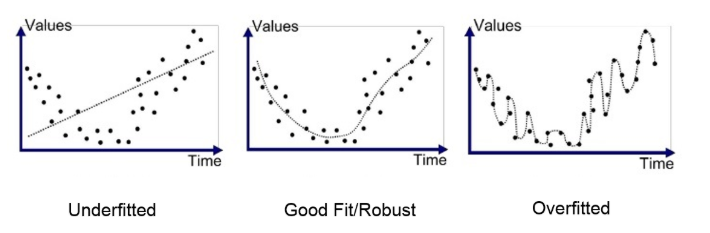

Overfitting: too much reliance on the training data

Underfitting: a failure to learn the relationships in the training data

High Variance: model changes significantly based on training data

High Bias: assumptions about model lead to ignoring training data

Overfitting and underfitting cause poor generalization on the test set

A validation set for model tuning can prevent under and overfitting

In [ ]:
#IRIS DATASET
iris_train,iris_test = model_selection.train_test_split(iris,test_size=0.2)
print("IRIS DATASET: " + str(len(iris)) + " rows")
print("Train = " + str(len(iris_train)) + " rows")
print("Test = " + str(len(iris_test)) + " rows")

#Resetting index for prediction time
iris_train = iris_train.reset_index(drop=True)
iris_test = iris_test.reset_index(drop=True)

IRIS DATASET: 150 rows
Train = 120 rows
Test = 30 rows


In [ ]:
#BOSTON DATASET
boston_train,boston_test = model_selection.train_test_split(boston,test_size=0.2)
print("BOSTON DATASET: " + str(len(boston)) + " rows")
print("Train = " + str(len(boston_train)) + " rows")
print("Test = " + str(len(boston_test)) + " rows")

#Resetting index for prediction time
boston_train = boston_train.reset_index(drop=True)
boston_test = boston_test.reset_index(drop=True)

BOSTON DATASET: 506 rows
Train = 404 rows
Test = 102 rows


Now your data is ready to start the feature selection and engineering process.

## Feature Selection & Engineering

We need to decide which features (columns) to use to make predictions. Even though the datasets we are using are smaller in nature, in real life we would tend to work on problems which have multiple columns in the data which would require analysis to see which columns would make sense to create the model with.

We will conduct this analysis ONLY on the training data.

**Curse of Dimensionality**


The curse of dimensionality refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces (often with hundreds or thousands of dimensions) that do not occur in low-dimensional settings such as the three-dimensional physical space of everyday experience. 

As the dimensionality increases, the volume of the space increases so fast that the available data become sparse. This sparsity is problematic for any method that requires statistical significance.

Therefore it is essential to quality control the data that is being fed to the model.

Reference - https://en.wikipedia.org/wiki/Curse_of_dimensionality

### Feature Engineering

**Null Handling**


Do either of the datasets have any null values that need to be handled/imputed?

In [ ]:
iris_train.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

There are no null values to be handled in the iris dataset

In [ ]:
boston_train.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no null values to be handled in the boston dataset either

Let us take a look at the boston dataset

In [ ]:
boston_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.893007,10.820545,11.097574,0.066832,0.556678,6.298181,69.247772,3.774986,9.680693,410.356436,18.500743,355.179035,12.574084,22.744059
std,9.334589,23.124930,6.924809,0.250040,0.114742,0.719683,27.637237,2.104738,8.781015,169.863284,2.138974,93.131939,7.038297,9.424638
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083545,0.000000,5.130000,0.000000,0.453000,5.893500,46.175000,2.102875,4.000000,279.750000,17.400000,375.300000,6.915000,17.075000
50%,0.274475,0.000000,9.690000,0.000000,0.538000,6.215500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.645000,21.300000
75%,3.694070,0.000000,18.100000,0.000000,0.624000,6.621500,93.900000,5.142150,24.000000,666.000000,20.200000,396.162500,16.530000,25.525000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Since the TAX column has a min of 187 and max of 711, we are going to use feature scaling to force the values between 0 and 1.

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
boston_train_tax = boston_train[['TAX']]
print("Range before scaling: " + str(boston_train_tax['TAX'].min()) + " - " + str(boston_train_tax['TAX'].max()))
boston_train_tax = min_max_scaler.fit_transform(boston_train_tax)
boston_train_tax_scaled = pd.DataFrame(boston_train_tax, columns=['TAX_SCALED'])
print("Range after scaling: " + str(boston_train_tax_scaled['TAX_SCALED'].min()) + " - " + str(boston_train_tax_scaled['TAX_SCALED'].max()))

Range before scaling: 187.0 - 711.0
Range after scaling: 0.0 - 1.0


Append this back to our train data

In [ ]:
boston_train = pd.concat([boston_train, boston_train_tax_scaled], axis=1)
boston_train.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAX_SCALED
0,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57,20.6,0.280534
1,0.14231,0.0,10.01,0.0,0.547,6.254,84.2,2.2565,6.0,432.0,17.8,388.74,10.45,18.5,0.467557
2,0.59005,0.0,21.89,0.0,0.624,6.372,97.9,2.3274,4.0,437.0,21.2,385.76,11.12,23.0,0.477099
3,15.86030,0.0,18.10,0.0,0.679,5.896,95.4,1.9096,24.0,666.0,20.2,7.68,24.39,8.3,0.914122
4,0.12757,30.0,4.93,0.0,0.428,6.393,7.8,7.0355,6.0,300.0,16.6,374.71,5.19,23.7,0.215649


**EXERCISE: Are there any new meaningful features you can generate from existing features in the Boston and Iris datasets?**

### Feature Selection

In the boston dataset, are there any columns that are not useful or have very low correlation?

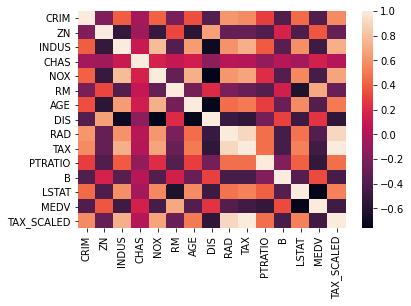

In [ ]:
boston_corr_matrix = boston_train.corr()
sns.heatmap(data=boston_corr_matrix, annot=False)

Since MEDV is our predict column, we want to pick features which have a positive and negative correlation with MEDV. Adding in columns which have a low or non-existent correlation would add to our 'Curse of Dimensionality' issue.

For this, let us pick only the top 4 most correlated features to MEDV for training our model.

In [ ]:
#printing all the correlations to MEDV in descending order
boston_corr_matrix['MEDV'].sort_values(ascending=False)

MEDV          1.000000
RM            0.693012
ZN            0.374364
B             0.334262
DIS           0.244523
CHAS          0.157011
AGE          -0.380750
RAD          -0.381768
CRIM         -0.394568
NOX          -0.432950
TAX_SCALED   -0.459569
TAX          -0.459569
INDUS        -0.473428
PTRATIO      -0.528652
LSTAT        -0.745558
Name: MEDV, dtype: float64

For this, let us pick 2 variables with high positive correlation (RM,ZN) and 2 with high negative correlation (PTRATIO, INDUS).

We will do this in the data pipeline section to ensure the same processes are done over the train and test datasets.

**EXERCISE: Does Iris dataset need any feature selection?**

### Data Pipeline

It is important to ensure your data pipeline is in place so that operations done on one dataset can be replicated across any other dataset. When doing any feature engineering, this code can be deployed on any dataset to ensure consistency in the experimentation.

We need to replicate the feature engineering that was done on the train data over our test data. This would be easy if the code is written is a very general way.

In [ ]:
#In our boston dataset, we added a new column called TAX_SCALED on our train data. We need to replicate it on test.
#Generalized the code from above into a function format so we can replicate it on our test dataset.
def scaleColumn(df,column_name):
  min_max_scaler = preprocessing.MinMaxScaler()
  df_col = df[[column_name]]
  print("Range before scaling: " + str(df_col[column_name].min()) + " - " + str(df_col[column_name].max()))
  df_col_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_col), columns=[column_name + "_SCALED"])
  new_df = pd.concat([df, df_col_scaled], axis=1)
  #print("Range after scaling: " + str(df_col[column_name + "_SCALED"].min()) + " - " + str(df_col[column_name + "_SCALED"].max()))
  return new_df

In [ ]:
boston_test = scaleColumn(boston_test,'TAX')
boston_test.head(5)

Range before scaling: 188.0 - 711.0


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAX_SCALED
0,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38,22.0,0.214149
1,0.82526,20.0,3.97,0.0,0.647,7.327,94.5,2.0788,5.0,264.0,13.0,393.42,11.25,31.0,0.145315
2,0.35233,0.0,21.89,0.0,0.624,6.454,98.4,1.8498,4.0,437.0,21.2,394.08,14.59,17.1,0.476099
3,1.15172,0.0,8.14,0.0,0.538,5.701,95.0,3.7872,4.0,307.0,21.0,358.77,18.35,13.1,0.227533
4,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,0.235182


If you have done any other operations on your data, generalize it to a function which can be applied to both your train and test datasets.

**EXERCISE: Generalize any other data operations you have done on your training data**

## Split Data into Features and Labels

For machine learning problems, you need to split your data into features and labels.


1.   Features - Input X to the model
2.   Label - Expected output Y

Therefore, we will further split these train and test datasets by columns, so that for every dataset we have **features** and **labels** to denote if they are the input columns or the predict to columns



For the Iris dataset, we are going to use all the columns as input features and predict 'species'

In [ ]:
#define input and predict to columns
iris_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris_labels = ['species']

print('IRIS DATASET')
print("Features - " + str(iris_features))
print("Labels - " + str(iris_labels))

iris_train_features = iris_train[iris_features]
iris_train_labels = iris_train[iris_labels]
print('✔ Train data split into features and labels')

iris_test_features = iris_test[iris_features]
iris_test_labels = iris_test[iris_labels]
print('✔ Test data split into features and labels')

IRIS DATASET
Features - ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels - ['species']
✔ Train data split into features and labels
✔ Test data split into features and labels


For the Boston dataset, we are going to use only input columns we selected from the Feature Selection process (RM, ZN, PTRATIO, INDUS) and the output column would be 'MEDV'

In [ ]:
#define input and predict to ccolumns
boston_features = ['RM', 'ZN', 'PTRATIO', 'INDUS']
boston_labels = ['MEDV']

print('BOSTON DATASET')
print("Features - " + str(boston_features))
print("Labels - " + str(boston_labels))

boston_train_features = boston_train[boston_features]
boston_train_labels = boston_train[boston_labels]
print('✔ Train data split into features and labels')

boston_test_features = boston_test[boston_features]
boston_test_labels = boston_test[boston_labels]
print('✔ Test data split into features and labels')

BOSTON DATASET
Features - ['RM', 'ZN', 'PTRATIO', 'INDUS']
Labels - ['MEDV']
✔ Train data split into features and labels
✔ Test data split into features and labels


## Model Creation

### Classification with Iris Data

We are going to use 3 different classification models for this exercise

1.   Naive Bayes
2.   Decision Trees
1.   Random Forest

#### Gaussian Naive Bayes
Documentation at https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

https://machinelearningmastery.com/naive-bayes-for-machine-learning/

Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. The technique is easiest to understand when described using binary or categorical input values.

It is called naive Bayes or idiot Bayes because the calculation of the probabilities for each hypothesis are simplified to make their calculation tractable. Rather than attempting to calculate the values of each attribute value P(d1, d2, d3|h), they are assumed to be conditionally independent given the target value and calculated as P(d1|h) * P(d2|H) and so on.

In [ ]:
def get_prediction_probability(predictions, probabilities):
  top_probability = pd.Series(dtype = "float64")
  for index in range(0,len(predictions)):
    top_probability = top_probability.append(pd.Series([probabilities[index][predictions[index]]]))
  top_probability.reset_index(drop=True, inplace=True)
  return top_probability

In [ ]:
#Create the model object and train
gnb = GaussianNB()
gnb.fit(iris_train_features, iris_train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Predictions on the Test data
#predictions on 2 rows only
predictions_gnb = gnb.predict(iris_test_features)
predictions_gnb

array([1, 2, 0, 0, 0, 1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 2, 2, 1, 0, 2, 0, 0,
       1, 0, 2, 0, 2, 1, 2, 1])

In [ ]:
predictions_probability_gnb = np.array(get_prediction_probability(predictions_gnb, gnb.predict_proba(iris_test_features)[:,]))
predictions_probability_gnb

array([0.99999757, 0.9523106 , 1.        , 1.        , 1.        ,
       0.99877623, 0.99999995, 1.        , 0.99995872, 1.        ,
       0.89113122, 0.9979912 , 1.        , 1.        , 0.98953344,
       0.83587842, 1.        , 0.99974122, 1.        , 0.99999988,
       1.        , 1.        , 0.80559684, 1.        , 1.        ,
       1.        , 0.99999986, 0.99879941, 0.99946289, 0.99993048])

In [ ]:
#Putting the above 2 cells together to create a readable df
gnb_df = pd.DataFrame(predictions_gnb.reshape(len(predictions_gnb),1))
gnb_df.rename(columns={0:'gnb_prediction'}, inplace=True)
gnb_df['gnb_probability'] = predictions_probability_gnb
gnb_df.head(5)

,gnb_prediction,gnb_probability
0,1,0.999998
1,2,0.952311
2,0,1.000000
3,0,1.000000
4,0,1.000000


In [ ]:
#Concatonating the predictions of naive bayes to the iris_test dataset
iris_test = iris_test.reset_index(drop=True)
iris_test_prediction = pd.concat([iris_test_labels, gnb_df], axis=1)
iris_test_prediction.head(5)

,species,gnb_prediction,gnb_probability
0,1,1,0.999998
1,2,2,0.952311
2,0,0,1.000000
3,0,0,1.000000
4,0,0,1.000000


#### Decision Trees
Documentation at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
#Create the model object and train
dt = tree.DecisionTreeClassifier()
dt.fit(iris_train_features, iris_train_labels)

#Predictions on the Test data
predictions_dt = dt.predict(iris_test_features)

#Getting the probabilities for these predictions
predictions_probability_dt = np.array(get_prediction_probability(predictions_dt, dt.predict_proba(iris_test_features)[:,]))

#Putting the above two together to create a readable df
dt_df = pd.DataFrame(predictions_dt.reshape(len(predictions_dt),1))
dt_df.rename(columns={0:'dt_prediction'}, inplace=True)
dt_df['dt_probability'] = predictions_probability_dt
dt_df.head(5)

,dt_prediction,dt_probability
0,1,1.0
1,2,1.0
2,0,1.0
3,0,1.0
4,0,1.0


In [ ]:
#Concatonating the predictions of decision tree to the iris_test dataset
iris_test = iris_test.reset_index(drop=True)
iris_test_prediction = pd.concat([iris_test_prediction, dt_df], axis=1)
iris_test_prediction.head(5)

,species,gnb_prediction,gnb_probability,dt_prediction,dt_probability
0,1,1,0.999998,1,1.0
1,2,2,0.952311,2,1.0
2,0,0,1.000000,0,1.0
3,0,0,1.000000,0,1.0
4,0,0,1.000000,0,1.0


#### Logistic Regression
Documentation at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
#Create the model object and train
logr = LogisticRegression()
logr.fit(iris_train_features, iris_train_labels)

#Predictions on the Test data
predictions_logr = logr.predict(iris_test_features)

#Getting the probabilities for these predictions
predictions_probability_logr = np.array(get_prediction_probability(predictions_logr, logr.predict_proba(iris_test_features)[:,]))

#Putting the above predictions and probabilities together to create a readable df
logr_df = pd.DataFrame(predictions_logr.reshape(len(predictions_logr),1))
logr_df.rename(columns={0:'logr_prediction'}, inplace=True)
logr_df['logr_probability'] = predictions_probability_logr
logr_df.head(5)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,logr_prediction,logr_probability
0,1,0.928563
1,2,0.766414
2,0,0.976893
3,0,0.983923
4,0,0.972619


In [ ]:
#Concatonating the predictions of decision tree to the iris_test dataset
iris_test_prediction = pd.concat([iris_test_prediction, logr_df], axis=1)
iris_test_prediction.head(5)

,species,gnb_prediction,gnb_probability,dt_prediction,dt_probability,logr_prediction,logr_probability
0,1,1,0.999998,1,1.0,1,0.928563
1,2,2,0.952311,2,1.0,2,0.766414
2,0,0,1.000000,0,1.0,0,0.976893
3,0,0,1.000000,0,1.0,0,0.983923
4,0,0,1.000000,0,1.0,0,0.972619


Now we have predictions from 3 classification models on the Iris dataset for comparison in the next section.

### Regression with Boston Data

#### Linear Regression
Documentation at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
lr = LinearRegression().fit(boston_train_features, boston_train_labels)

#Predictions on the Test data
predictions_lr = lr.predict(boston_test_features)

#Putting the above predictions and probabilities together to create a readable df
lr_df = pd.DataFrame(predictions_lr.reshape(len(predictions_lr),1))
lr_df.rename(columns={0:'lr_prediction'}, inplace=True)
lr_df.head(5)

,lr_prediction
0,30.555493
1,37.829631
2,18.302376
3,16.273197
4,22.648703


In [ ]:
#Concatonating the predictions of decision tree to the iris_test dataset
boston_test_prediction = pd.concat([boston_test_labels, lr_df], axis=1)
boston_test_prediction.head(5)

,MEDV,lr_prediction
0,22.0,30.555493
1,31.0,37.829631
2,17.1,18.302376
3,13.1,16.273197
4,16.5,22.648703


#### Random Forest Regression
Documentation at https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
rfr = RandomForestRegressor().fit(boston_train_features, boston_train_labels)

#Predictions on the Test data
predictions_rfr = rfr.predict(boston_test_features)

#Putting the above predictions and probabilities together to create a readable df
rfr_df = pd.DataFrame(predictions_rfr.reshape(len(predictions_rfr),1))
rfr_df.rename(columns={0:'rfr_prediction'}, inplace=True)
rfr_df.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


,rfr_prediction
0,30.230
1,35.132
2,18.293
3,14.498
4,18.789


In [ ]:
#Concatonating the predictions of decision tree to the iris_test dataset
boston_test_prediction = pd.concat([boston_test_prediction, rfr_df], axis=1)
boston_test_prediction.head(5)

,MEDV,lr_prediction,rfr_prediction
0,22.0,30.555493,30.230
1,31.0,37.829631,35.132
2,17.1,18.302376,18.293
3,13.1,16.273197,14.498
4,16.5,22.648703,18.789


#### Support Vector Machines
Documentation at https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [ ]:
svm = svm.SVR().fit(boston_train_features, boston_train_labels)

#Predictions on the Test data
predictions_svm = svm.predict(boston_test_features)

#Putting the above predictions and probabilities together to create a readable df
svm_df = pd.DataFrame(predictions_svm.reshape(len(predictions_svm),1))
svm_df.rename(columns={0:'svm_prediction'}, inplace=True)
svm_df.head(5)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,svm_prediction
0,27.284179
1,26.484021
2,16.664763
3,20.236212
4,22.917944


In [ ]:
#Concatonating the predictions of decision tree to the iris_test dataset
boston_test_prediction = pd.concat([boston_test_prediction, svm_df], axis=1)
boston_test_prediction.head(5)

,MEDV,lr_prediction,rfr_prediction,svm_prediction
0,22.0,30.555493,30.230,27.284179
1,31.0,37.829631,35.132,26.484021
2,17.1,18.302376,18.293,16.664763
3,13.1,16.273197,14.498,20.236212
4,16.5,22.648703,18.789,22.917944


Now we have 3 regression models to compare.

## Performance Measures

Depending on the type of solution we are building (classification/regression), there are different ways to analyze the performance of a model

###Classification

Since the output of the model is a specific category, a given prediction can only be either right or wrong. For such a solution, we start off by bulding a [confusion matrix](https://www.geeksforgeeks.org/confusion-matrix-machine-learning/), which we will use to generate the performance metrics.

Confusion matrix is built in the following manner where TP, FP, FN, TN map to counts of rows in which actual and predicted values are the row/column values

![alt text](https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png)

From this confusion matrix, we can build performance metrics for a classification problem as shown below:

![alt text](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)

***Accuracy***
Gives an overall idea on how many cases your model made a right prediction in your dataset. If the accuracy is 0.6, it can be read as 60% of the test instances were predicted correctly.

***Precision***
With precision, we are evaluating our data by its performance of ‘positive’ predictions.

***Recall/Sensitivity***
With recall, we are evaluating our data by its performance of the ground truths for positive outcomes. Meaning, we are judging how well predicted positive when the result was Positive.

***F1-Score***
F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution.
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/1bf179c30b00db201ce1895d88fe2915d58e6bfd)
“F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution.” — Renuka Joshi

***ROC curve/AUC Score***
The ROC curve is a way to maximize our accuracy of the model by playing around with the threshold of confidence of the predictions. 
![alt text](https://miro.medium.com/max/722/1*pk05QGzoWhCgRiiFbz-oKQ.png)

Reference - https://becominghuman.ai/understand-classification-performance-metrics-cad56f2da3aa

For our Iris dataset, let us use accuracy as our performance metric and our goal is to maximize this value.

In [ ]:
iris_test_prediction.head(5)

,species,gnb_prediction,gnb_probability,dt_prediction,dt_probability,logr_prediction,logr_probability
0,1,1,0.999998,1,1.0,1,0.928563
1,2,2,0.952311,2,1.0,2,0.766414
2,0,0,1.000000,0,1.0,0,0.976893
3,0,0,1.000000,0,1.0,0,0.983923
4,0,0,1.000000,0,1.0,0,0.972619


In [ ]:
accuracy_score(iris_test_prediction['species'], iris_test_prediction['gnb_prediction'])

0.9666666666666667

In [ ]:
accuracy_score(iris_test_prediction['species'], iris_test_prediction['dt_prediction'])

0.9666666666666667

In [ ]:
accuracy_score(iris_test_prediction['species'], iris_test_prediction['logr_prediction'])

0.9666666666666667

### Regression

Unlike a classification problem, the objective of a regression problem is to predict a numerical value (eg. cost of a house) and it would be difficult to predict a house value spot-on. Since the output of the model is numerical, we analyze how 'far away' the predictions are from the ground truth.

***Mean Absolute Error (MAE)***
![alt text](https://miro.medium.com/max/1280/1*2wWmoXUV8ic6Xz1LvzxWfw.png)
The Mean Absolute Error measures the average of the absolute difference between each ground truth and the predictions. The MAE is an absolute measure of fit - On an average, the predictions are off from the ground truths by a value of MAE.

     

***Root Mean Squared Error (RMSE)***

![alt text](https://miro.medium.com/max/1984/1*k-OzeL6IuG5fUbsX2lKJfw.png)
The Root Mean Squared Error measures the square root of the average of the squared difference between the predictions and the ground truth. Notice that the RMSE is larger than the MAE. Since the RMSE is squaring the difference between the predictions and the ground truth, any significant difference is made more substantial when it is being squared. RMSE is more sensitive to outliers.


***R-Squared***


![alt text](https://miro.medium.com/max/2568/1*pKx5cF_Fx6nco2KNowSuvA.png)
If you like to understand how well the independent variables “explain” the variance in your model, the R-Squared formula can be powerful. The weaker the variance between our model and the linear model is, the stronger the R^Squared.

***Adjusted R-squared***


![alt text](https://miro.medium.com/max/880/1*Ss-l42a56Mt6wxmEUEX1jg.png)
One of the pitfalls of the R-squared is that it will always improve as we increase the number of variables. The Adjusted R-Squared fixes this problem as it adds a penalty to the model.


Reference - https://becominghuman.ai/understand-regression-performance-metrics-bdb0e7fcc1b3

Let us use RMSE as our metric to validate the regression models. Our goal is to minimize the RMSE value.

In [ ]:
boston_test_prediction.head(5)

,MEDV,lr_prediction,rfr_prediction,svm_prediction
0,22.0,30.555493,30.230,27.284179
1,31.0,37.829631,35.132,26.484021
2,17.1,18.302376,18.293,16.664763
3,13.1,16.273197,14.498,20.236212
4,16.5,22.648703,18.789,22.917944


In [ ]:
mean_squared_error(boston_test_prediction['MEDV'], boston_test_prediction['lr_prediction'])

28.851713309280324

In [ ]:
mean_squared_error(boston_test_prediction['MEDV'], boston_test_prediction['rfr_prediction'])

26.450809964589975

In [ ]:
mean_squared_error(boston_test_prediction['MEDV'], boston_test_prediction['svm_prediction'])

48.23623878499375

## Model Tuning & Optimization

Most models give you control on the paramters for building the model. We built default models till now, lets take a look at one example where we build a similar model with different parameters and see how this affects the accuracy.

In [ ]:
#Create the model object and train
logr_v2 = LogisticRegression(max_iter=500,fit_intercept=False)
logr_v2.fit(iris_train_features, iris_train_labels)

#Predictions on the Test data
predictions_logr_v2 = logr_v2.predict(iris_test_features)

#Getting the probabilities for these predictions
predictions_probability_logr_v2 = logr_v2.predict_proba(iris_test_features)[:, 1]

#Putting the above predictions and probabilities together to create a readable df
logr_v2_df = pd.DataFrame(predictions_logr_v2.reshape(len(predictions_logr_v2),1))
logr_v2_df.rename(columns={0:'logr_v2_prediction'}, inplace=True)
logr_v2_df['logr_v2_probability'] = predictions_probability_logr_v2
logr_v2_df.head(5)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,logr_v2_prediction,logr_v2_probability
0,1,0.788708
1,2,0.187310
2,0,0.021988
3,0,0.028091
4,0,0.018670


In [ ]:
#Concatonating the predictions of decision tree to the iris_test dataset
iris_test_prediction = pd.concat([iris_test_prediction, logr_v2_df], axis=1)
iris_test_prediction.head(5)

,species,gnb_prediction,gnb_probability,dt_prediction,dt_probability,logr_prediction,logr_probability,logr_v2_prediction,logr_v2_probability
0,1,1,0.999998,1,1.0,1,0.928563,1,0.788708
1,2,2,0.952311,2,1.0,2,0.766414,2,0.187310
2,0,0,1.000000,0,1.0,0,0.976893,0,0.021988
3,0,0,1.000000,0,1.0,0,0.983923,0,0.028091
4,0,0,1.000000,0,1.0,0,0.972619,0,0.018670


In [ ]:
accuracy_score(iris_test_prediction['species'], iris_test_prediction['logr_prediction'])

0.9666666666666667

In [ ]:
accuracy_score(iris_test_prediction['species'], iris_test_prediction['logr_v2_prediction'])

0.9666666666666667

Addition of max_iter and fit_intercept parameters changed the way the model was trained, and therefore changed the predictions it generated.

**EXERCISE: For the models built, look up the official sklearn documentation and see how change in paramters affect the model performance.**

## Model Selection

The model with the best performance metric should be selected. In this case, we are writing a function that compares the accuracy metrics of multiple models and return the one with the highest accuracy metric.

In [ ]:
def maxAccuracy(df, actual_value, model_pred_list):
  max_model = ''
  max_accuracy = 0
  for model in model_pred_list:
    acc = accuracy_score(df[actual_value], df[model])
    if acc > max_accuracy:
      max_model = model
      max_accuracy = acc

  print("MAX: " + max_model + " - " + str(max_accuracy))

In [ ]:
maxAccuracy(iris_test_prediction,'species',['gnb_prediction','dt_prediction','logr_prediction','logr_v2_prediction'])

MAX: gnb_prediction - 0.9666666666666667


**EXERCISE: Write a similar function to find the best regression model (minimize the RMSE)**

You can take a look at: https://github.com/WWCode-SV/Mini_Data_Science_Bootcamp/blob/master/hotel_booking.ipynb